In [2]:
!pip install seaborn

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('/Users/oyazaimoglu/Desktop/Machine Learning/bikeshare.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [4]:
bikes.dur.mean()

992.8716543657755

In [5]:
bikes.dur.std()

2073.9809135296514

In [6]:
bikes[bikes.dur>16000].shape

(973, 12)

In [7]:
plt.rcParams['figure.figsize'] = 20, 10

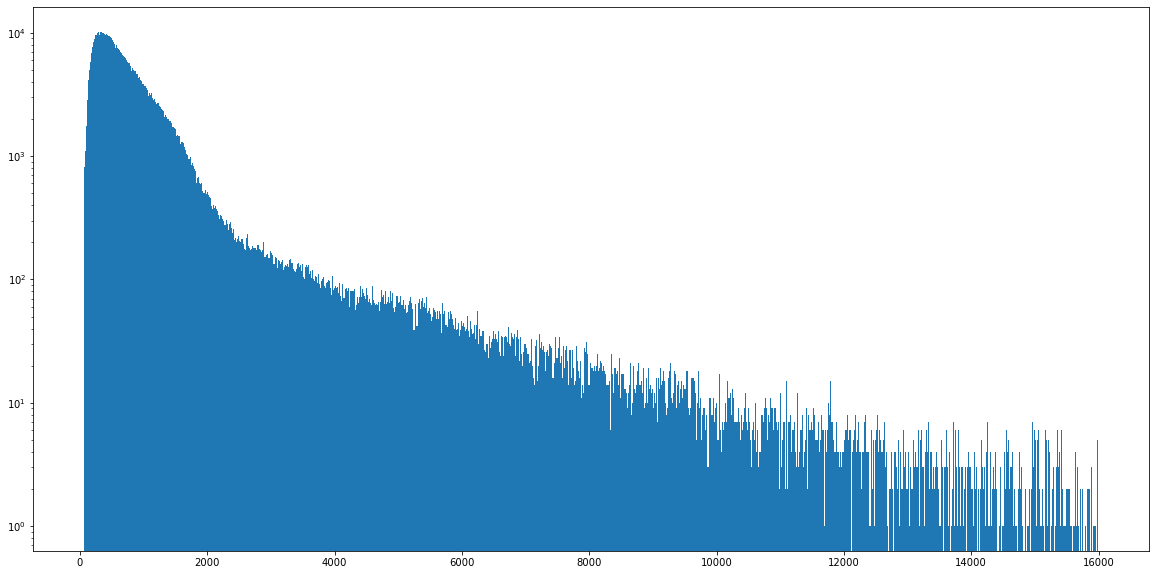

In [8]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)


In [9]:
short = bikes[bikes.dur<16000]

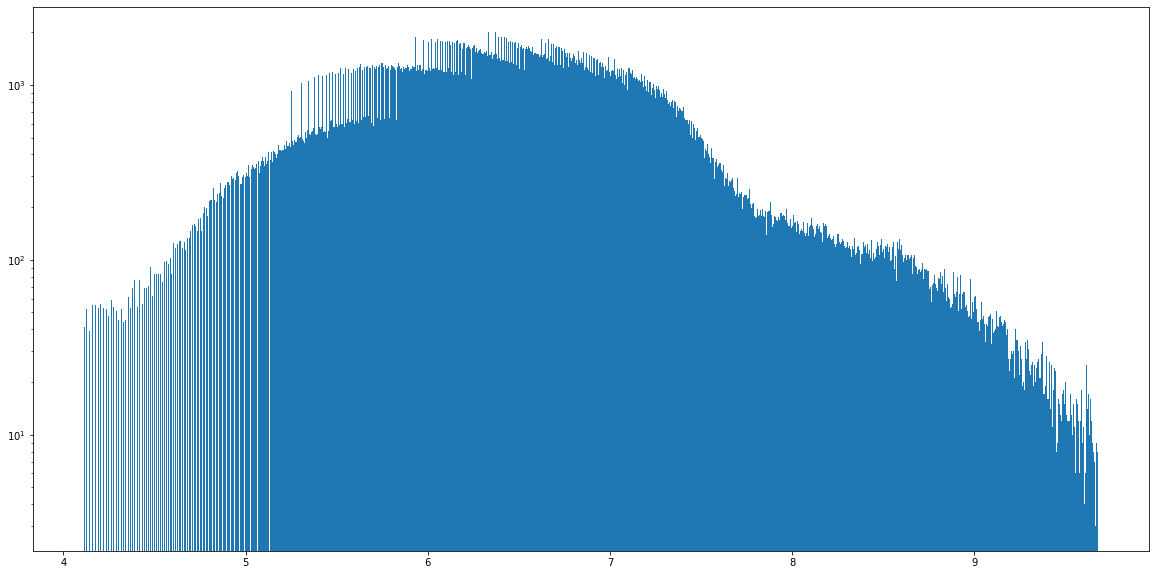

In [10]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

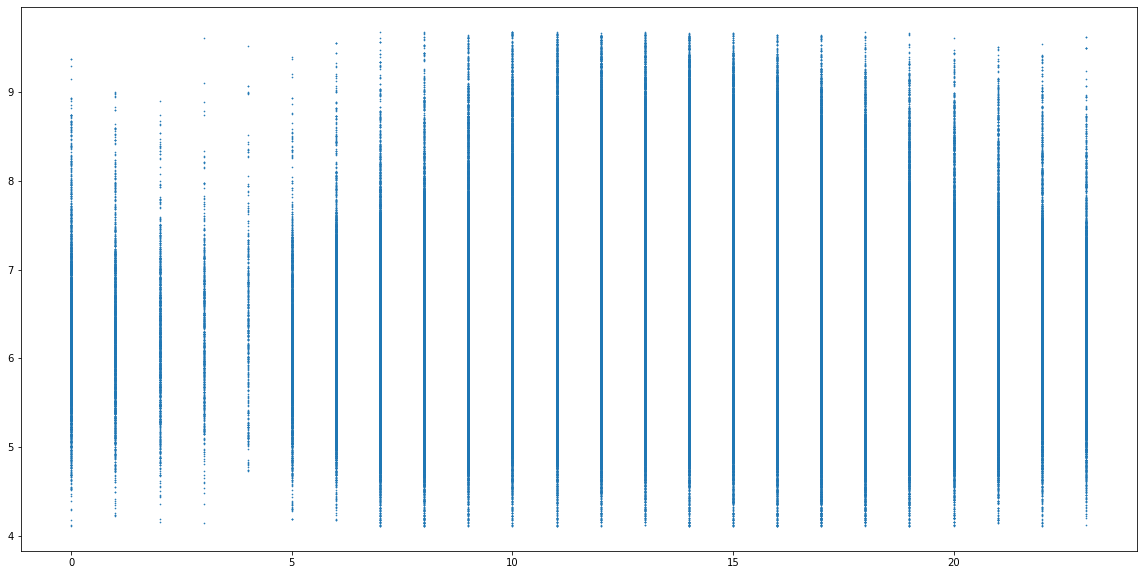

In [11]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [12]:
np.log1p(0), np.log(0)

/var/folders/72/bdcjdw7170n5n6xnyz6plhfm0000gn/T/ipykernel_55315/1076539907.py:1: RuntimeWarning: divide by zero encountered in log
  np.log1p(0), np.log(0)


(0.0, -inf)

In [13]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [14]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [15]:
monday

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur,log_dur
21902,1099087,3/29/2016 23:59,3/30/2016 0:17,32048,Bethesda Metro,31300,Van Ness Metro / UDC,W01068,Registered,2016-03-29 23:59:00,2016-03-30 00:17:00,1099,7.0
21903,237265,3/29/2016 23:56,3/30/2016 0:00,31121,Calvert St & Woodley Pl NW,31104,Adams Mill & Columbia Rd NW,W21652,Registered,2016-03-29 23:56:00,2016-03-30 00:00:00,237,5.5
21904,752052,3/29/2016 23:56,3/30/2016 0:08,31624,North Capitol St & F St NW,31269,3rd St & Pennsylvania Ave SE,W22247,Registered,2016-03-29 23:56:00,2016-03-30 00:08:00,752,6.6
21905,841244,3/29/2016 23:56,3/30/2016 0:10,31602,Park Rd & Holmead Pl NW,31509,New Jersey Ave & R St NW,W00221,Registered,2016-03-29 23:56:00,2016-03-30 00:10:00,841,6.7
21906,378049,3/29/2016 23:56,3/30/2016 0:03,31228,8th & H St NW,31241,Thomas Circle,W21169,Registered,2016-03-29 23:56:00,2016-03-30 00:03:00,378,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534155,443749,1/5/2016 0:44,1/5/2016 0:51,31111,10th & U St NW,31114,18th St & Wyoming Ave NW,W20257,Registered,2016-01-05 00:44:00,2016-01-05 00:51:00,443,6.1
534156,141606,1/5/2016 0:17,1/5/2016 0:19,31008,12th & Army Navy Dr,31090,6th & S Ball St,W00467,Registered,2016-01-05 00:17:00,2016-01-05 00:19:00,141,5.0
534157,390382,1/5/2016 0:12,1/5/2016 0:19,31601,19th & East Capitol St SE,31632,15th & F St NE,W00711,Registered,2016-01-05 00:12:00,2016-01-05 00:19:00,390,6.0
534158,430236,1/5/2016 0:06,1/5/2016 0:14,31281,8th & O St NW,31627,M St & Delaware Ave NE,W00189,Registered,2016-01-05 00:06:00,2016-01-05 00:14:00,430,6.1


In [16]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [17]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
...                      ...         ...       ...                   ...   
11.2    21                 2           2         2                     2   
11.3    14                 1           1         1                     1   
        17                 1           1         1                     1   
        19                 1           1         1                     1   
11.4    18                 1           1         1                     1   

               Start station  End station number  End station  Bike number  \
log_dur start                                                                
4.1     7                  1                   1            1            1   
        9                  2                   2            2            2   
        11                 1                   1            1            1   
        14                 2                   2            2            2   
        16                 2                   2            2            2   
...                      ...                 ...          ...          ...   
11.2    21                 2                   2            2            2   
11.3    14                 1                   1            1            1   
        17                 1                   1            1            1   
        19                 1                   1            1            1   
11.4    18                 1                   1            1            1   

               Member Type  start  end  dur  
log_dur start                                
4.1     7                1      1    1    1  
        9                2      2    2    2  
        11               1      1    1    1  
        14               2      2    2    2  
        16               2      2    2    2  
...                    ...    ...  ...  ...  
11.2    21               2      2    2    2  
11.3    14               1      1    1    1  
        17               1      1    1    1  
        19               1      1    1    1  
11.4    18               1      1    1    1  

[1184 rows x 12 columns]

In [18]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


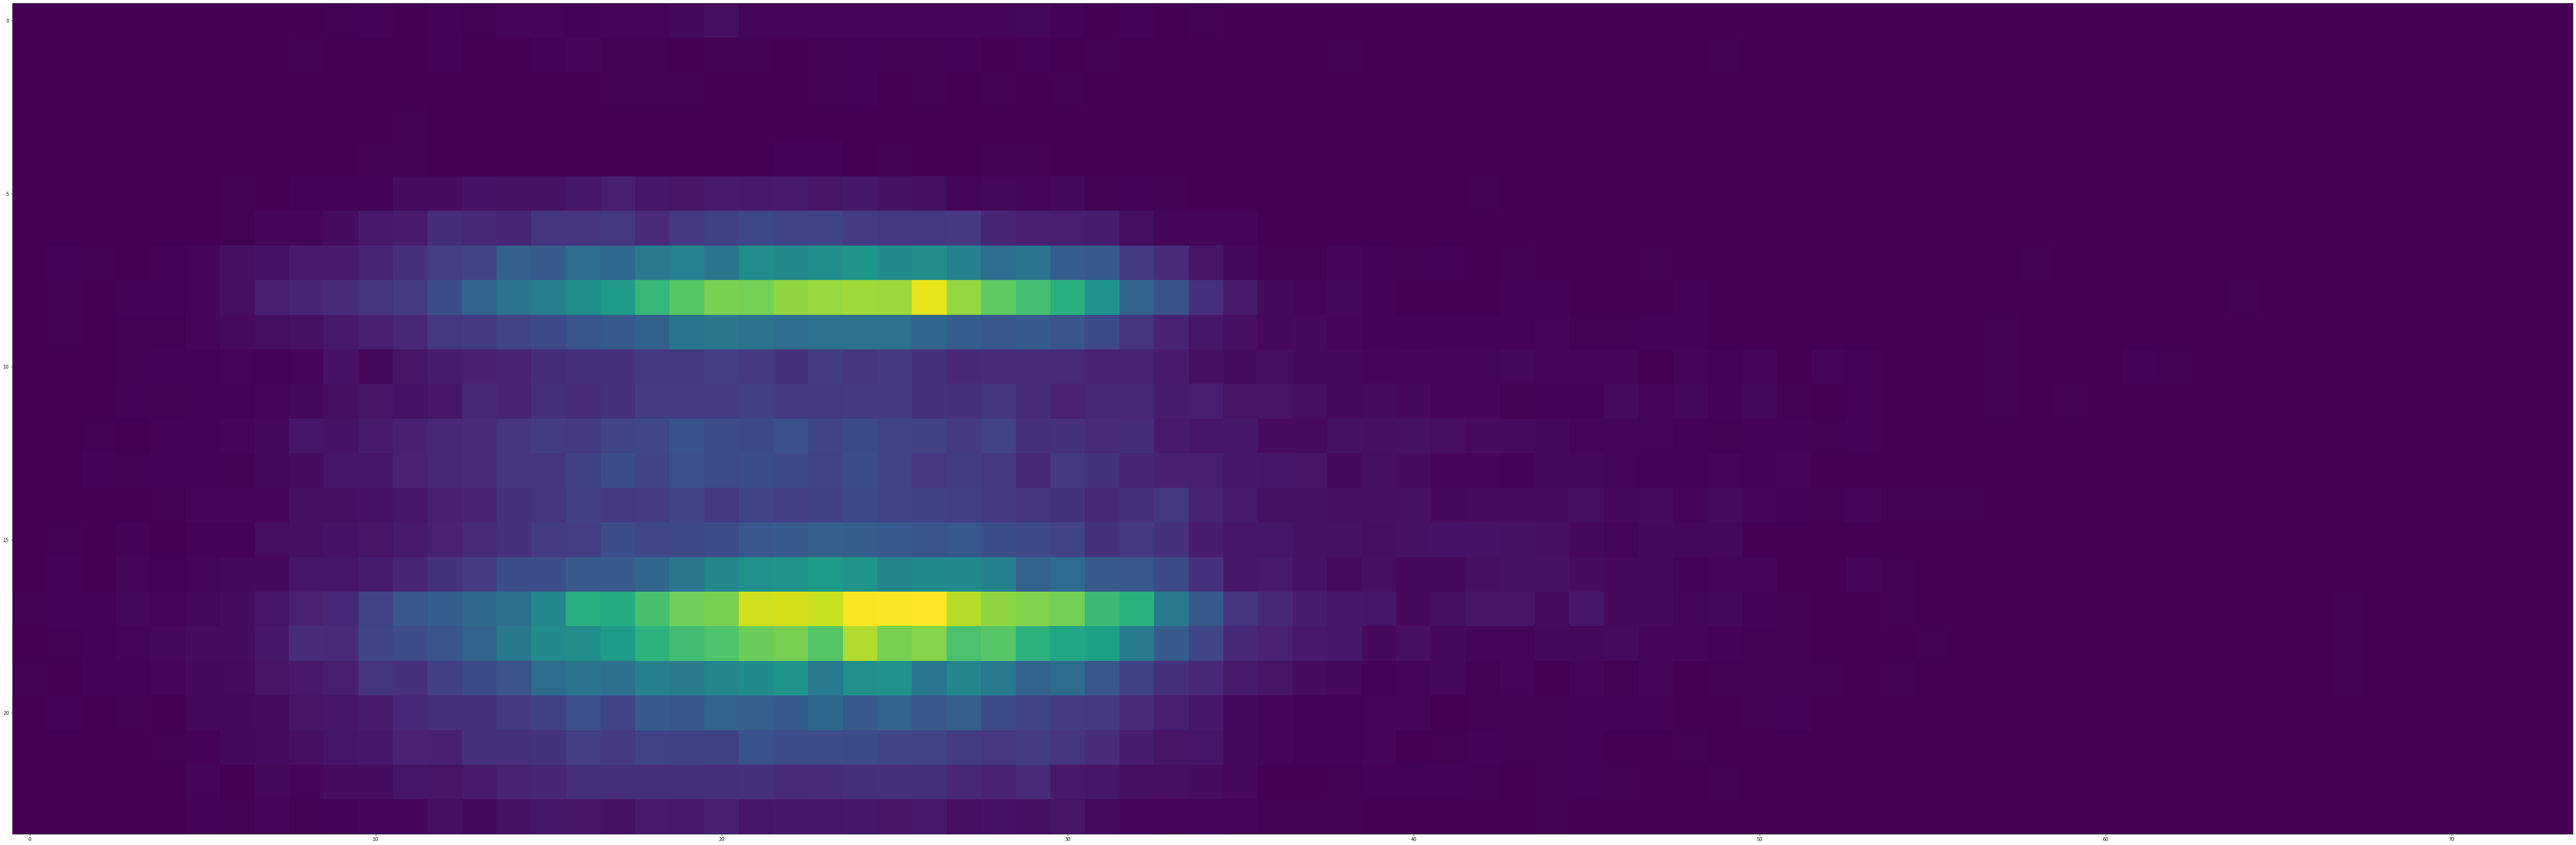

In [19]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

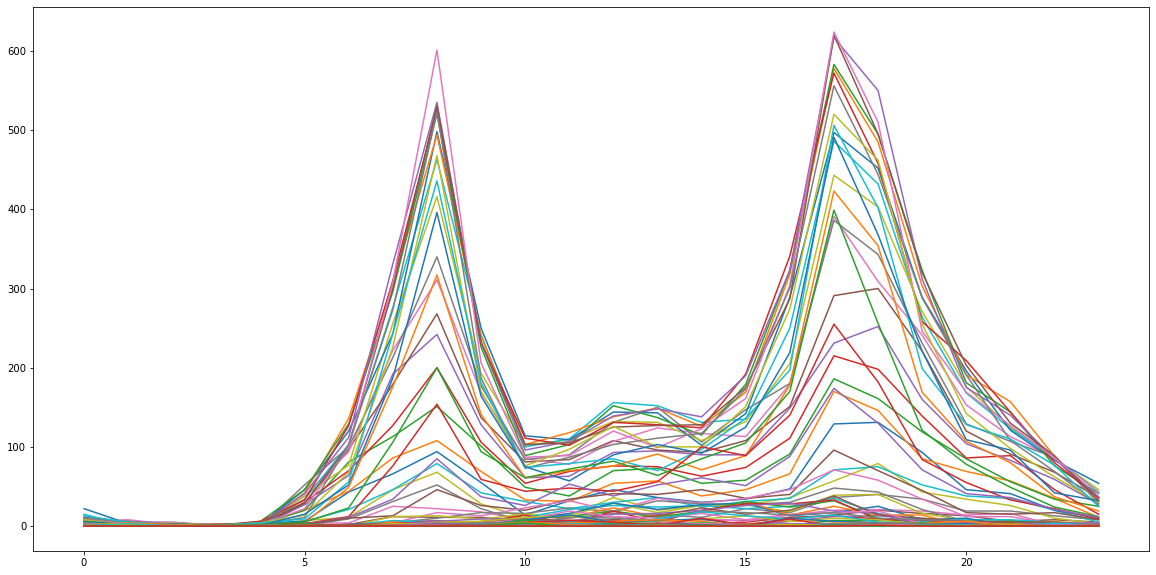

In [20]:
_=plt.plot(duration_hour)

In [21]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

In [22]:
# Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

np.round(.65, 1)

0.6

In [23]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [24]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [25]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

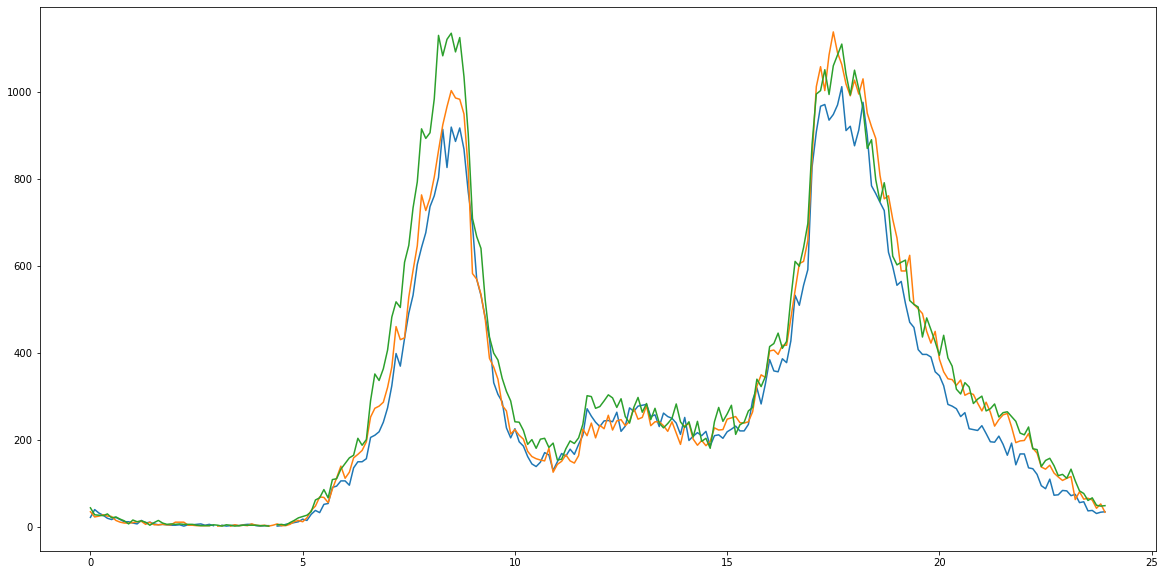

In [26]:
# Aggregate to get a count per hour/minute of the day across all trips

reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
# plt.plot(y.index, day_hour_count[3])
# plt.plot(y.index, day_hour_count[4])
# plt.plot(y.index, day_hour_count[5])
# plt.plot(y.index, day_hour_count[6])


In [27]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


<AxesSubplot:xlabel='roundhour_of_day'>

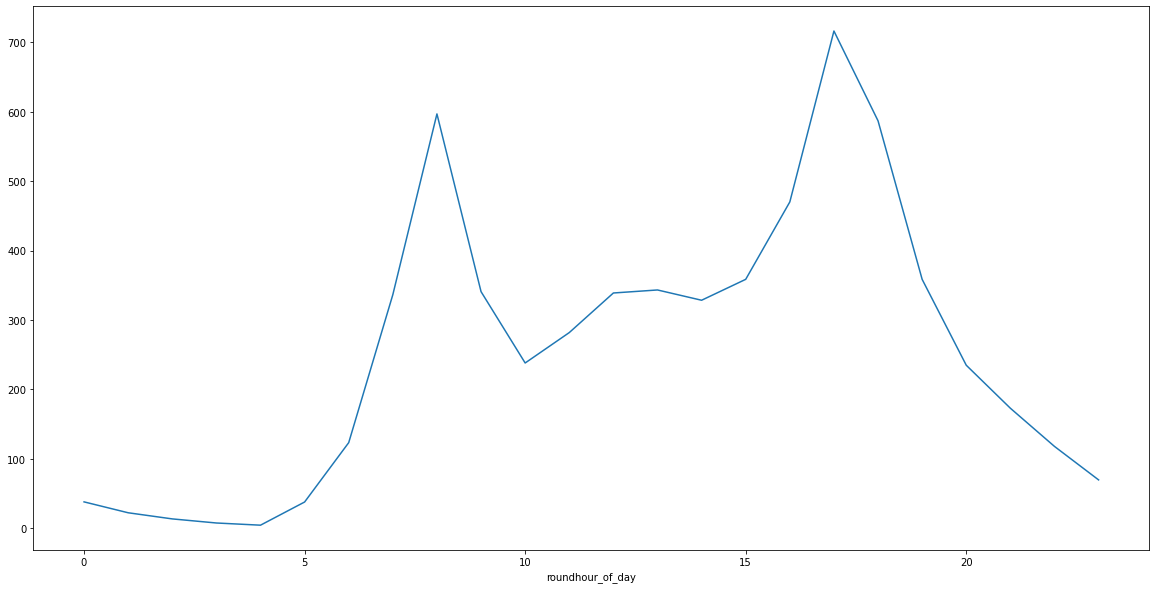

In [28]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [29]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

<AxesSubplot:xlabel='start'>

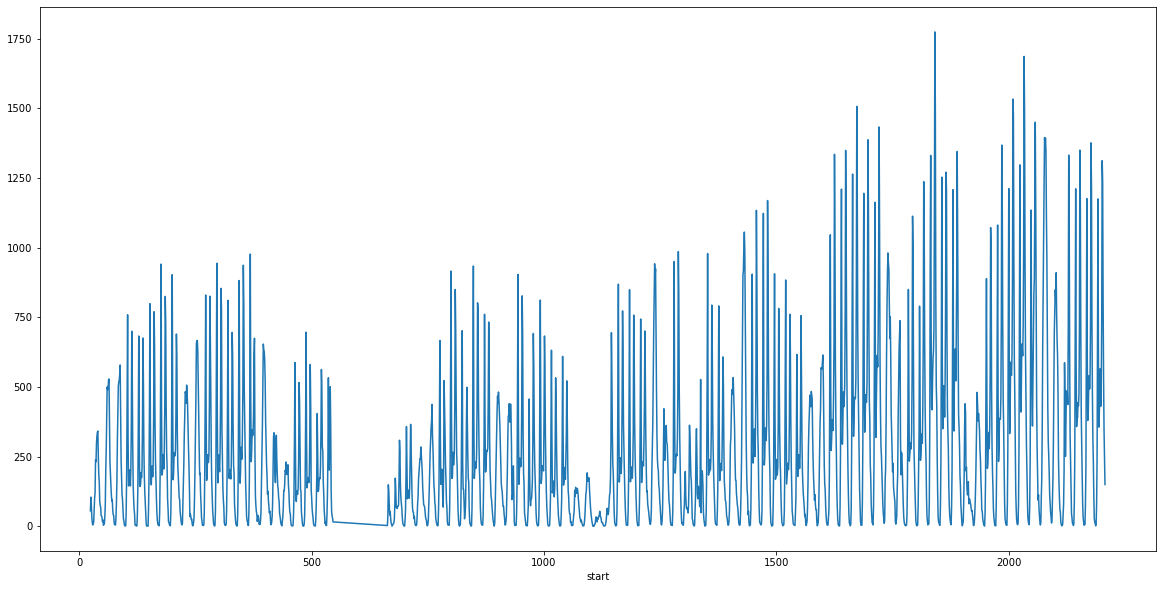

In [30]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [31]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()


In [32]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()


In [33]:
day_hour.start.unstack()


start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start,,,,,,,,,,,,,,,,,,,,,
1,56.0,105.0,74.0,32.0,13.0,5.0,10.0,14.0,54.0,101.0,...,324.0,338.0,342.0,247.0,185.0,160.0,90.0,75.0,70.0,39.0
2,37.0,31.0,17.0,23.0,4.0,7.0,10.0,34.0,80.0,203.0,...,495.0,525.0,529.0,392.0,232.0,188.0,150.0,114.0,91.0,96.0
3,59.0,42.0,39.0,15.0,6.0,9.0,5.0,33.0,87.0,168.0,...,524.0,546.0,579.0,398.0,237.0,172.0,115.0,96.0,64.0,28.0
4,20.0,6.0,2.0,1.0,3.0,58.0,192.0,468.0,759.0,321.0,...,145.0,206.0,365.0,700.0,547.0,293.0,146.0,96.0,62.0,44.0
5,5.0,5.0,3.0,1.0,2.0,42.0,131.0,363.0,683.0,329.0,...,175.0,208.0,365.0,676.0,519.0,279.0,178.0,122.0,86.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,113.0,82.0,50.0,34.0,12.0,24.0,94.0,166.0,297.0,509.0,...,910.0,761.0,667.0,611.0,475.0,243.0,158.0,101.0,62.0,51.0
88,15.0,7.0,2.0,3.0,8.0,42.0,81.0,197.0,587.0,464.0,...,481.0,437.0,696.0,1332.0,1113.0,620.0,324.0,226.0,148.0,45.0
89,31.0,11.0,9.0,3.0,8.0,79.0,240.0,727.0,1211.0,564.0,...,433.0,473.0,700.0,1350.0,1159.0,700.0,400.0,279.0,178.0,82.0


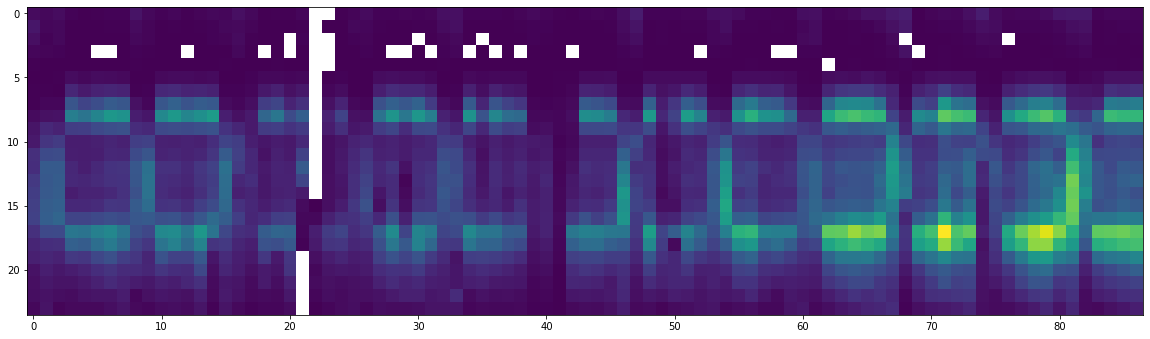

In [34]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

<AxesSubplot:xlabel='start'>

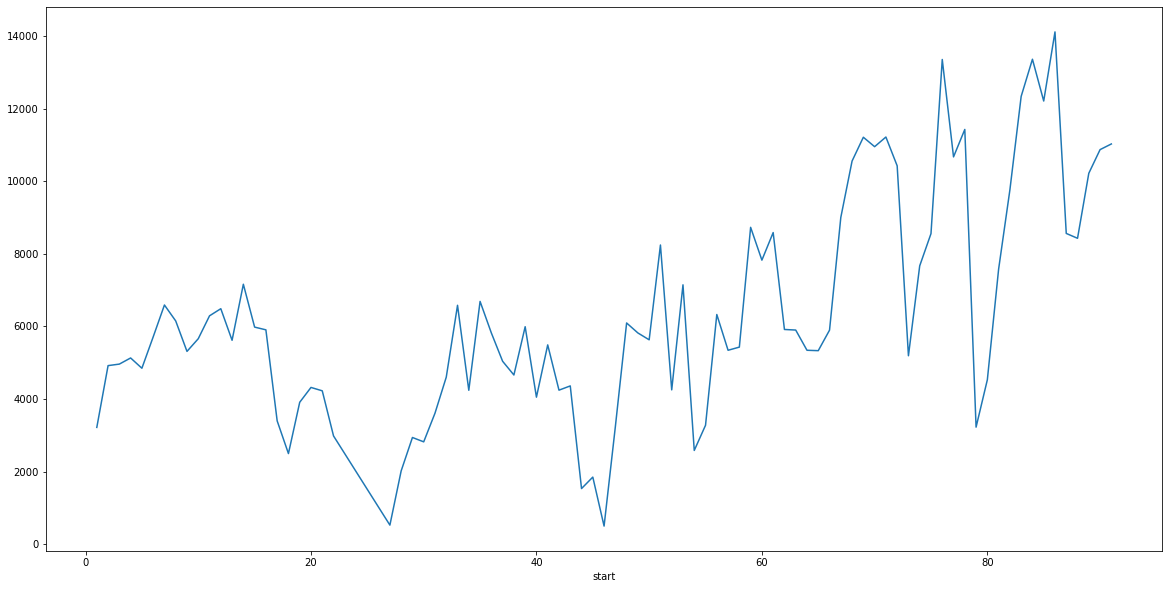

In [35]:
day_count.start.plot()


In [36]:
bikes.start.dt.dayofyear


0         91
1         91
2         91
3         91
4         91
          ..
552394     1
552395     1
552396     1
552397     1
552398     1
Name: start, Length: 552399, dtype: int64

In [37]:
bikes[bikes.start=="2016-01-10"].shape


(1, 15)

In [38]:
# Question 1
# Using the day_hour_count dataframe create two dataframes
# monday and saturday that represent the data for those days. (hint: Monday is day=0)


In [39]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


In [40]:
monday = day_hour_count[[0]].copy()


In [41]:
monday["hour"] = monday.index


In [42]:
monday

start,0,hour
hour_of_day,,
0.0,21.0,0.0
0.1,39.0,0.1
0.2,31.0,0.2
0.3,26.0,0.3
0.4,19.0,0.4
...,...,...
23.5,36.0,23.5
23.6,37.0,23.6
23.7,30.0,23.7


In [43]:
saturday = day_hour_count[[5]]. copy()

In [44]:
saturday["hour"] = saturday.index

In [45]:
saturday

start,5,hour
hour_of_day,,
0.0,89.0,0.0
0.1,87.0,0.1
0.2,98.0,0.2
0.3,99.0,0.3
0.4,98.0,0.4
...,...,...
23.5,93.0,23.5
23.6,95.0,23.6
23.7,105.0,23.7


In [46]:
# Question 2
# 2a. Create 3 models fit to monday.hour_of_day with varying polynomial degrees (choose from n=1,2,3,5,10,15)
# (Repeat for saturday below)
# Plot all the results for each polynomial

In [47]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

In [73]:
monday.fillna(0)
monday.rename(columns ={0: 'count', 'hour': 'hour_of_day'})

start,count,hour_of_day
hour_of_day,,
0.0,21.0,0.0
0.1,39.0,0.1
0.2,31.0,0.2
0.3,26.0,0.3
0.4,19.0,0.4
...,...,...
23.5,36.0,23.5
23.6,37.0,23.6
23.7,30.0,23.7


In [74]:
print(monday.shape)

(240, 2)


In [88]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = monday.iloc[:, 1:2].values
y = monday.iloc[:, 1].values

In [89]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
  
lin.fit(X, y)

LinearRegression()

In [99]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 15)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

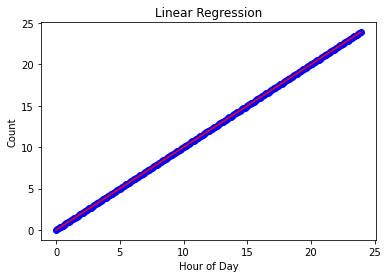

In [100]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
  
plt.show()

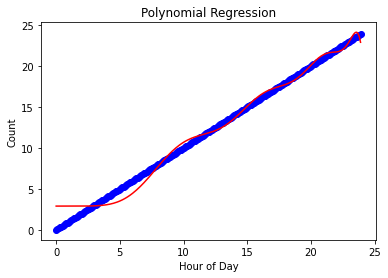

In [101]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
  
plt.show()

In [102]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

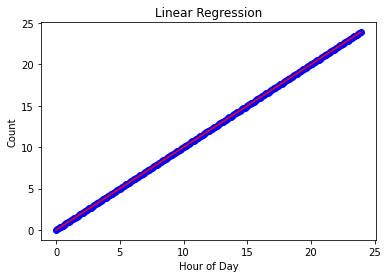

In [103]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
  
plt.show()

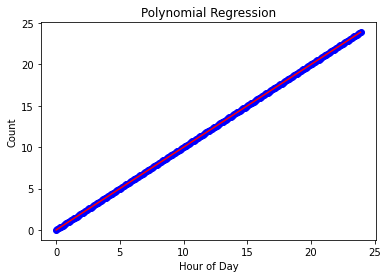

In [104]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
  
plt.show()

In [50]:
# 2b: Repeat 2a for saturday.hour_of_day

In [106]:
saturday.fillna(0)
saturday.rename(columns ={5: 'count', 'hour': 'hour_of_day'})

start,count,hour_of_day
hour_of_day,,
0.0,89.0,0.0
0.1,87.0,0.1
0.2,98.0,0.2
0.3,99.0,0.3
0.4,98.0,0.4
...,...,...
23.5,93.0,23.5
23.6,95.0,23.6
23.7,105.0,23.7


In [107]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = saturday.iloc[:, 1:2].values
y = saturday.iloc[:, 1].values

In [108]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
  
lin.fit(X, y)

LinearRegression()

In [109]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 15)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

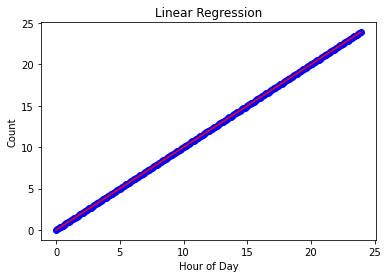

In [110]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
  
plt.show()

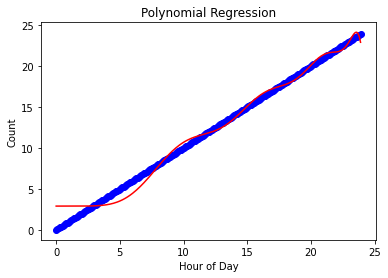

In [111]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
  
plt.show()

In [112]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

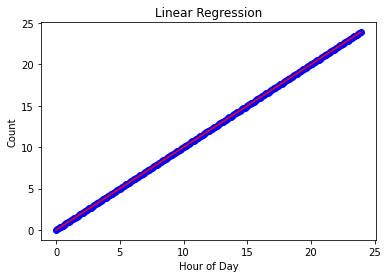

In [113]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
  
plt.show()

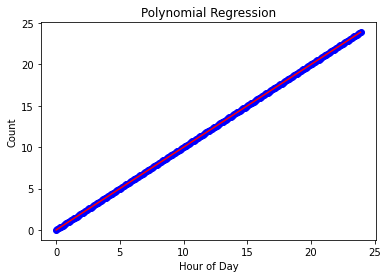

In [114]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
  
plt.show()

In [51]:
# Question 3

In [52]:
# create 3 new models fit to hour_of_day with different Ridge Regression 
# α (alpha) Ridge Coefficient values using the monday and saturday datasets.

In [115]:
linear = linear_model.LinearRegression()

linear.fit(X, y)

LinearRegression()

In [116]:
### Ridge 1

ridge_1 = linear_model.Ridge(alpha=.5)

ridge_1.fit(X, y)

Ridge(alpha=0.5)

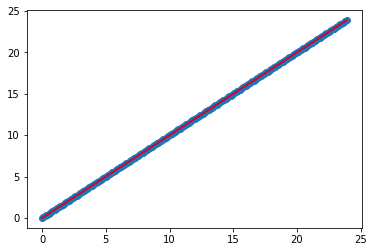

In [118]:
plt.scatter(X,y)
plt.plot(X, X*linear.coef_ + linear.intercept_, c='b')
plt.plot(X, X*ridge_1.coef_ + ridge_1.intercept_, c='r')

In [119]:
### Ridge 2

ridge_2 = linear_model.Ridge(alpha=1)

ridge_2.fit(X, y)

Ridge(alpha=1)

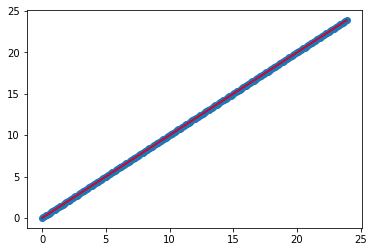

In [120]:
plt.scatter(X,y)
plt.plot(X, X*linear.coef_ + linear.intercept_, c='b')
plt.plot(X, X*ridge_2.coef_ + ridge_2.intercept_, c='r')

In [121]:
### Ridge 3

ridge_3 = linear_model.Ridge(alpha=1.5)

ridge_3.fit(X, y)

Ridge(alpha=1.5)

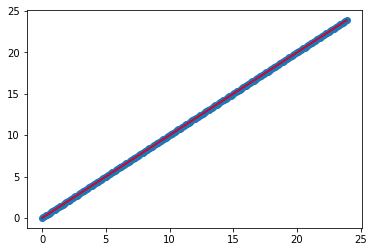

In [122]:
plt.scatter(X,y)
plt.plot(X, X*linear.coef_ + linear.intercept_, c='b')
plt.plot(X, X*ridge_2.coef_ + ridge_2.intercept_, c='r')